<div dir=rtl>

## מעבדה לפיסיקה 2

</center>

<h1><center>התנגדות</center></h1>

<div dir=rtl>

תיעוד ניסוי "התנגדות"<br>
    <font color='red'>אין קובץ עזר זה מחליף את תדריך הניסוי! למהלך הניסוי, יש לפנות לתדריך הניסוי!</font>
    
    גרסה 0.15
    
***
<div dir=rtl>
תאריך:
<div dir=rtl>
עמדה:
<div dir=rtl>
מבצעים/ות:


***
<div dir=rtl> <b> הערות: </b> <br>
    .
    
.
    
.
    
.
    

<div dir=rtl>

### ייבוא חבילות לעיבוד הנתונים ולקיחת מדידות

In [204]:
import numpy as np  # math functions
import matplotlib.pyplot as plt  # for plotting figures and setting their properties
from scipy.integrate import cumulative_trapezoid  # numerical integration
from scipy.stats import linregress  # linear regression

<div dir=rtl>
<h3>
   מתוך שאלות ההכנה:
</h3>

<div class="alert alert-block alert-danger", dir=rtl>
<b>טיפ:</b> נחוץ מקור לכל ציטוט ערך ספרותי
</div>

In [205]:
# Resistivity (Ohm·m)
rho_lit_Cu = 1.68e-8  # Source: https://en.wikipedia.org/wiki/Electrical_resistivity_and_conductivity
rho_lit_Mo = 5.34e-8  # Source: https://www.rsc.org/periodic-table/element/42/molybdenum

# Resistance of a diameter=0.07mm, length=20cm wire:

diameter = 0.07e-3  # meters
length = 0.2  # meters
area = np.pi * (diameter / 2) ** 2  # cross-sectional area in m^2

R_Cu = rho_lit_Cu * length / area
R_Mo = rho_lit_Mo * length / area

# Density (kg/m³)
dens_lit_Cu = 8960  # Source: https://en.wikipedia.org/wiki/Copper
dens_lit_Mo = 10280  # Source: https://www.rsc.org/periodic-table/element/42/molybdenum

# Heat capacity (J/kg·K)
hc_lit_Cu = 384.7  # Source: https://www.engineeringtoolbox.com/specific-heat-capacity-d_391.html
hc_lit_Mo = 251  # Source: https://www.webelements.com/molybdenum/physics.html

# Temperature coefficient of resistance (1/°C)
alpha_lit_Cu = 0.0039  # Source: https://www.engineeringtoolbox.com/temperature-resistance-d_755.html
alpha_lit_Mo = 0.0045  # Source: https://www.analog.com/en/resources/technical-articles/metal-selection-for-pcb-thermal-management.html

<h1>
    מהלך הניסוי 
<a id="mahalah"></a>
</h1>

<h3>
   מדידות מקדימות:
</h3>

<div class="alert alert-block alert-info", dir=rtl>
<b>טיפ:</b> המולטימטר הוא הכלי היעודי שלנו למדידת התנגדות.
</div>

In [206]:
# זכרו להשתמש במולטימטר בשביל למדוד את ההתנגדות
# High wattage resistor:
R_0 = .356
R_0_err = (R_0 * 0.050 + 0.008 * 100) / 100

# Wire resistors:
# 
R_1 = .907
R_1_err = (R_1 * 0.050 + 0.008 * 100) / 100
#
R_2 = .914
R_2_err = (R_2 * 0.050 + 0.008 * 100) / 100
#
R_3 = 2.604
R_3_err = (R_3 * 0.050 + 0.008 * 100) / 100
#
R_4 = 2.599
R_4_err = (R_4 * 0.050 + 0.008 * 100) / 100

R_1, R_1_err

(0.907, 0.008453500000000001)

<div class="alert alert-block alert-warning", dir=rtl>
<b>בדיקה עצמית:</b> האם ההתנגדות המדודה תואמת לצפוי (לפי פירוט הנגד\מבנה התיל?)
</div>

<h3>
   מדידת פולס
</h3>


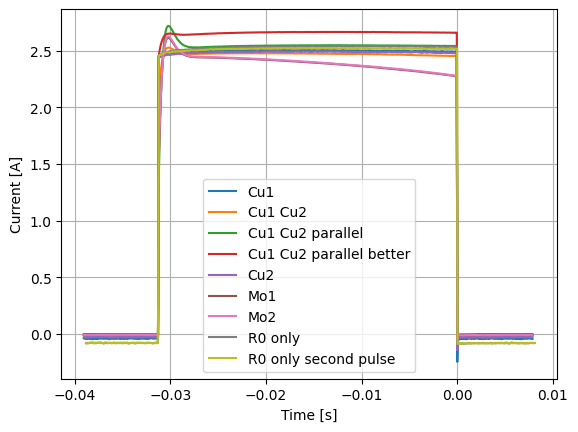

In [207]:
def importData(filename):
    # use skiprows to skip the scope setup information
    # usecols column numbers starting from 0
    try:
        t, v1 = np.loadtxt(filename, delimiter=',', skiprows=59, usecols=[3, 5]).T
    except ValueError:
        t, v1 = np.loadtxt(filename, delimiter=',', skiprows=59, usecols=[3, 4]).T
    return t, v1


filename1 = "R0_only.csv"
t1, Vx1 = importData(filename1)
Vr1 = Vx1  #
Ir1 = Vx1 / R_0  #

filename2 = "R0_only_second_pulse.csv"
t2, Vx2 = importData(filename2)
Vr2 = Vx2  #
Ir2 = Vx2 / R_0

for filename in ["Cu1", "Cu1_Cu2", "Cu1_Cu2_parallel", "Cu1_Cu2_parallel_better", "Cu2", "Mo1", "Mo2", "R0_only", "R0_only_second_pulse"]:
    full_filename = filename + ".CSV"
    t, Vx = importData(full_filename)
    I = Vx / R_0
    plt.plot(t, I, label=filename.replace("_", " "))

### plotting:
# plt.plot(t1, Ir1, 'o', label='First pulse')
# plt.plot(t2, Ir1, '.', label='Second pulse', alpha=0.1)
plt.xlabel('Time [s]')
plt.ylabel('Current [A]')
plt.legend()
plt.grid()
# TODO: Error bars, maximal values/avg

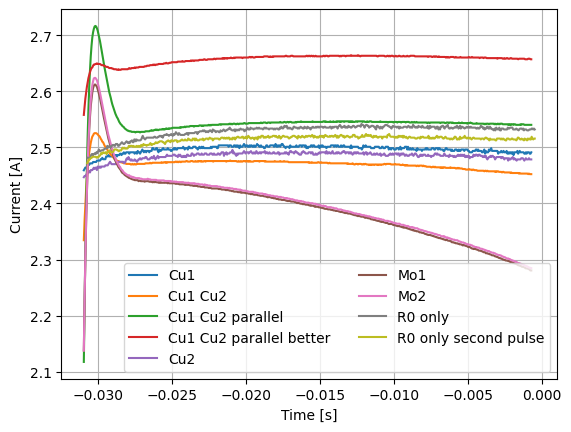

In [208]:
def importData(filename):
    # use skiprows to skip the scope setup information
    # usecols column numbers starting from 0
    try:
        t, v1 = np.loadtxt(filename, delimiter=',', skiprows=59, usecols=[3, 5]).T
    except ValueError:
        t, v1 = np.loadtxt(filename, delimiter=',', skiprows=59, usecols=[3, 4]).T
    return t, v1

start, end = (155, -165)
for filename in ["Cu1", "Cu1_Cu2", "Cu1_Cu2_parallel", "Cu1_Cu2_parallel_better", "Cu2", "Mo1", "Mo2", "R0_only", "R0_only_second_pulse"]:
    full_filename = filename + ".CSV"
    t, Vx = importData(full_filename)
    t = t[start:end]
    Vx = Vx[start:end]
    I = Vx / R_0

    plt.plot(t, I, label=filename.replace("_", " "))

### plotting:
# plt.plot(t1, Ir1, 'o', label='First pulse')
# plt.plot(t2, Ir1, '.', label='Second pulse', alpha=0.1)
plt.xlabel('Time [s]')
plt.ylabel('Current [A]')
plt.legend(loc="lower right", ncol=2)#, fontsize='small')
plt.grid()
# TODO: Error bars, maximal values/avg

<div dir=rtl>
    <h3>
    מדידת התנגדות # (תיל: )
</h3>

<div class="alert alert-block alert-success", dir=rtl>
<b>רגע של מחשבה:</b> מה צפויות להיות יחידות הזמן? איך נרצה "לחתוך" את הצגת האות שלנו כדי להתמקד בעיקר?
</div>

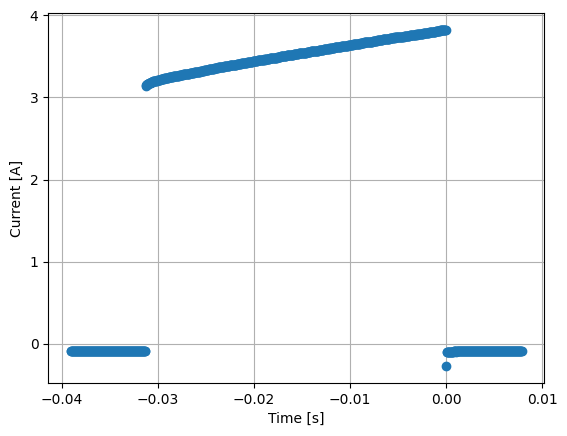

In [209]:
def importData(filename):
    # use skiprows to skip the scope setup information
    # usecols column numbers starting from 0
    return np.loadtxt(filename, delimiter=',', skiprows=59, usecols=[3, 4, 5]).T


filename = "Cu1.CSV"
t, Vx, Vy = importData(filename)

### We can use indice slicing to focus only on the data we're interested in:
t0 = 0  # ms
t1 = 30e-3  # ms
interval = (t > t0) & (t < t1)
# t = t[interval]
# Vy = Vy[interval]

### plotting:
plt.plot(t, Vx, 'o', label='Voltage [V]')
plt.xlabel('Time [s]')
plt.ylabel('Current [A]')
# plt.legend()
plt.grid()


In [210]:
### plotting:
# plt.plot(t, Vx, 'o', label='Voltage [V]')
# plt.xlabel('Time [s]')
# plt.ylabel('Current [A]')
# # plt.legend()
# plt.grid()

$$ \Delta Q(t) = \int_0^t I(t')V(t') dt' $$

$$ R(t) = R_{t=0}\left(1+\frac{\alpha}{c\cdot m}\Delta Q(t)\right) $$

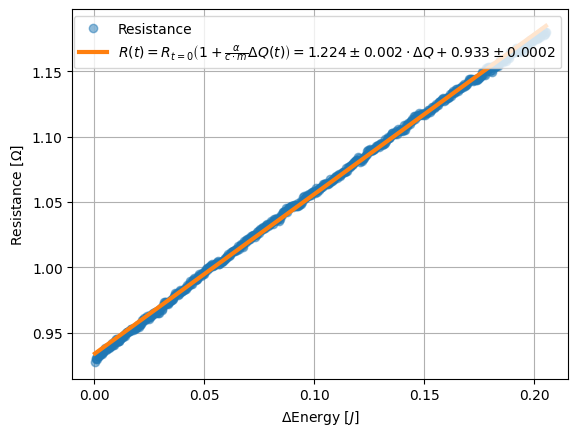

In [211]:
### Given t, Vx, Vy, write a function that returns all the necessary data for analysis:
### Current through and Voltage on the wire (I, V), it's resistance (R) and accumulated energy (E)
def IVRE(t, Vx, Vy):
    current = Vy / R_0
    voltage = Vx - Vy
    energy = cumulative_trapezoid(current * voltage, t)
    resistance = voltage / current
    return current, voltage, resistance, energy


current, voltage, resistance, energy = IVRE(t, Vx, Vy)
start = np.argmin(resistance[140:160]) + 140
d_resistance = np.diff(resistance[720:750])
end = 750  #np.argmax(d_resistance) + 720
# resistance = resistance[start:end]
# TODO: Zero measurements

sliced_resistance = resistance[start:end]
sliced_energy = energy[start:end]

plt.plot(sliced_energy, sliced_resistance, 'o', label='Resistance', alpha=0.5)
plt.xlabel(r'$\Delta\mathrm{Energy}\ [J]$')
plt.ylabel(r'Resistance [$\Omega$]')
plt.grid()

# Linear regression
fit = linregress(sliced_energy, sliced_resistance)
x_lin = fit.slope * sliced_energy + fit.intercept

digits_amount = 4
slope = round(fit.slope, digits_amount)
slope_err = round(fit.stderr, digits_amount)
intercept = round(fit.intercept, digits_amount)
intercept_err = round(fit.intercept_stderr, digits_amount)

plt.plot(sliced_energy, x_lin, '-', label = fr"$R(t) = R_{{t=0}}\left(1+\frac{{\alpha}}{{c \cdot m}} \Delta Q(t)\right)= {slope:.3f} \pm {slope_err:.3f} \cdot \Delta Q + {intercept:.3f} \pm {intercept_err:.4f}$"
, linewidth=3,)

plt.legend()
# TODO: Error bars

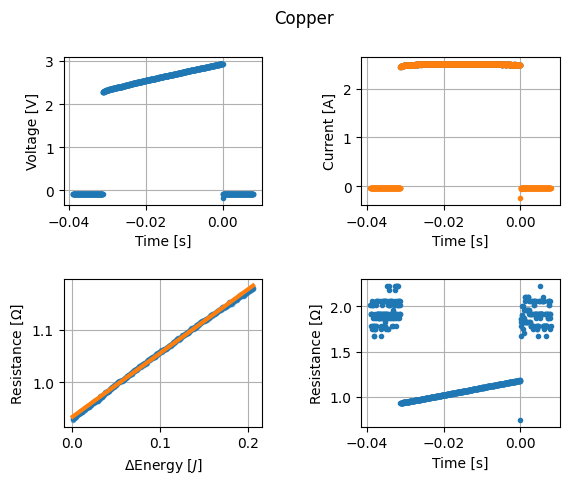

In [212]:
fig, axs = plt.subplots(2,2)
fig.suptitle("Copper")
voltage_plot = axs[0, 0]
current_plot = axs[0, 1]
energy_plot = axs[1, 0]
resistance_plot = axs[1, 1]
t, Vx, Vy = importData("Cu1.CSV")

current, voltage, resistance, energy = IVRE(t, Vx, Vy)
start = np.argmin(resistance[140:160]) + 140
d_resistance = np.diff(resistance[720:750])
end = 750  #np.argmax(d_resistance) + 720
# resistance = resistance[start:end]
# TODO: Zero measurements

plt.subplots_adjust(wspace=0.5, hspace=0.5)

# voltage_plot.plot(t[start:end], voltage[start:end], '.')
voltage_plot.plot(t, voltage, '.')
voltage_plot.set_xlabel('Time [s]')
voltage_plot.set_ylabel('Voltage [V]')
voltage_plot.grid()

current_plot.plot(t[start:end], current[start:end], '.')
current_plot.plot(t, current, '.')
current_plot.set_xlabel('Time [s]')
current_plot.set_ylabel('Current [A]')
current_plot.grid()

sliced_resistance = resistance[start:end]
sliced_energy = energy[start:end]

copper_only = (t[:], energy[:])
# resistance_plot.plot(t[start:end], sliced_resistance, '.')
resistance_plot.plot(t, resistance, '.')
resistance_plot.set_xlabel('Time [s]')
resistance_plot.set_ylabel('Resistance [Ω]')
resistance_plot.grid()

energy_plot.plot(sliced_energy, sliced_resistance, '.', label='Resistance', alpha=0.5)
energy_plot.set_xlabel(r'$\Delta\mathrm{Energy}\ [J]$')
energy_plot.set_ylabel(r'Resistance [$\Omega$]')
energy_plot.grid()

# Linear regression
fit = linregress(sliced_energy, sliced_resistance)
x_lin = fit.slope * sliced_energy + fit.intercept

digits_amount = 4
slope = round(fit.slope, digits_amount)
slope_err = round(fit.stderr, digits_amount)
intercept = round(fit.intercept, digits_amount)
intercept_err = round(fit.intercept_stderr, digits_amount)

energy_plot.plot(sliced_energy, x_lin, '-', linewidth=3)
# TODO: Error bars
# TODO: Use IEEE notation for bibliography

In [213]:
regression_R_0 = intercept
regression_R_0_err = intercept_err
regression_alpha_c_m = slope / regression_R_0
# regression_alpha_c_m_err = slope_err / regression_R_0_err
regression_alpha_c_m_err = np.hypot(slope_err/slope, regression_R_0_err/regression_R_0) * regression_alpha_c_m

alpha_c = regression_alpha_c_m * (dens_lit_Cu * length * area)
alpha_c_err = regression_alpha_c_m_err * (dens_lit_Cu * length * area)

print(f"Measured {alpha_c=:.7e} ± {alpha_c_err:.7e}")

theoretical_alpha_c = ((1.9e-7/rho_lit_Cu) - 1)/(1000-23) / hc_lit_Cu
print(f"Calculated {theoretical_alpha_c=:.7e}")

Measured alpha_c=9.0388591e-06 ± 1.1977915e-08
Calculated theoretical_alpha_c=2.7429750e-05


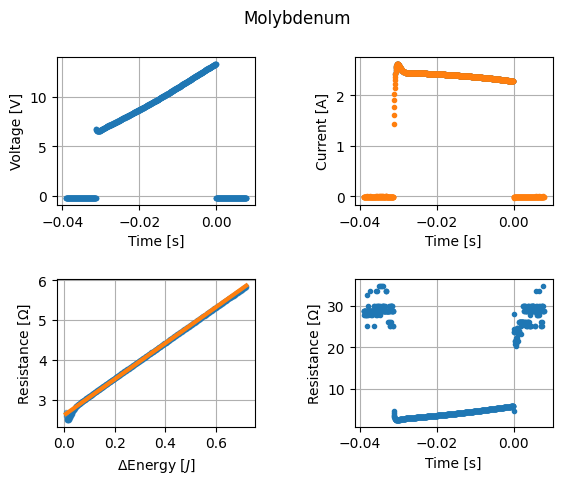

In [214]:
fig, axs = plt.subplots(2,2)
fig.suptitle("Molybdenum")
voltage_plot = axs[0, 0]
current_plot = axs[0, 1]
energy_plot = axs[1, 0]
resistance_plot = axs[1, 1]
t, Vx, Vy = importData("Mo2.CSV")

current, voltage, resistance, energy = IVRE(t, Vx, Vy)
start = np.argmin(resistance[140:160]) + 140
d_resistance = np.diff(resistance[720:750])
end = 750  #np.argmax(d_resistance) + 720
# resistance = resistance[start:end]
# TODO: Zero measurements

plt.subplots_adjust(wspace=0.5, hspace=0.5)

# voltage_plot.plot(t[start:end], voltage[start:end], '.')
voltage_plot.plot(t, voltage, '.')
voltage_plot.set_xlabel('Time [s]')
voltage_plot.set_ylabel('Voltage [V]')
voltage_plot.grid()

current_plot.plot(t[start:end], current[start:end], '.')
current_plot.plot(t, current, '.')
current_plot.set_xlabel('Time [s]')
current_plot.set_ylabel('Current [A]')
current_plot.grid()

sliced_resistance = resistance[start:end]
sliced_energy = energy[start:end]

# resistance_plot.plot(t[start:end], sliced_resistance, '.')
resistance_plot.plot(t, resistance, '.')
resistance_plot.set_xlabel('Time [s]')
resistance_plot.set_ylabel('Resistance [Ω]')
resistance_plot.grid()

energy_plot.plot(sliced_energy, sliced_resistance, '.', label='Resistance', alpha=0.5)
energy_plot.set_xlabel(r'$\Delta\mathrm{Energy}\ [J]$')
energy_plot.set_ylabel(r'Resistance [$\Omega$]')
energy_plot.grid()

# Linear regression
fit = linregress(sliced_energy, sliced_resistance)
x_lin = fit.slope * sliced_energy + fit.intercept

digits_amount = 4
slope = round(fit.slope, digits_amount)
slope_err = round(fit.stderr, digits_amount)
intercept = round(fit.intercept, digits_amount)
intercept_err = round(fit.intercept_stderr, digits_amount)

energy_plot.plot(sliced_energy, x_lin, '-', linewidth=3)
# TODO: Error bars
# TODO: Use IEEE notation for bibliography

In [215]:
regression_R_0 = intercept
regression_R_0_err = intercept_err
regression_alpha_c_m = slope / regression_R_0
# regression_alpha_c_m_err = slope_err / regression_R_0_err
regression_alpha_c_m_err = np.hypot(slope_err/slope, regression_R_0_err/regression_R_0) * regression_alpha_c_m

alpha_c = regression_alpha_c_m * (dens_lit_Cu * length * area)
alpha_c_err = regression_alpha_c_m_err * (dens_lit_Cu * length * area)

print(f"Measured {alpha_c=:.7e} ± {alpha_c_err:.7e}")

theoretical_alpha_c = ((1.9e-7/rho_lit_Cu) - 1)/(1000-23) / hc_lit_Cu
print(f"Calculated {theoretical_alpha_c=:.7e}")

Measured alpha_c=1.1855674e-05 ± 2.2817226e-08
Calculated theoretical_alpha_c=2.7429750e-05


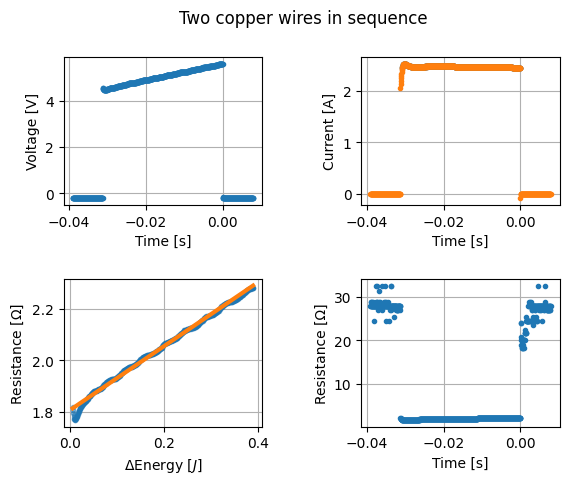

In [216]:
fig, axs = plt.subplots(2,2)
fig.suptitle("Two copper wires in sequence")
voltage_plot = axs[0, 0]
current_plot = axs[0, 1]
energy_plot = axs[1, 0]
resistance_plot = axs[1, 1]
t, Vx, Vy = importData("Cu1_Cu2.CSV")

current, voltage, resistance, energy = IVRE(t, Vx, Vy)
start = np.argmin(resistance[140:160]) + 140
d_resistance = np.diff(resistance[720:750])
end = 750  #np.argmax(d_resistance) + 720
# resistance = resistance[start:end]
# TODO: Zero measurements

plt.subplots_adjust(wspace=0.5, hspace=0.5)

# voltage_plot.plot(t[start:end], voltage[start:end], '.')
voltage_plot.plot(t, voltage, '.')
voltage_plot.set_xlabel('Time [s]')
voltage_plot.set_ylabel('Voltage [V]')
voltage_plot.grid()

current_plot.plot(t[start:end], current[start:end], '.')
current_plot.plot(t, current, '.')
current_plot.set_xlabel('Time [s]')
current_plot.set_ylabel('Current [A]')
current_plot.grid()

sliced_resistance = resistance[start:end]
sliced_energy = energy[start:end]

# resistance_plot.plot(t[start:end], sliced_resistance, '.')
resistance_plot.plot(t, resistance, '.')
resistance_plot.set_xlabel('Time [s]')
resistance_plot.set_ylabel('Resistance [Ω]')
resistance_plot.grid()

energy_plot.plot(sliced_energy, sliced_resistance, '.', label='Resistance', alpha=0.5)
energy_plot.set_xlabel(r'$\Delta\mathrm{Energy}\ [J]$')
energy_plot.set_ylabel(r'Resistance [$\Omega$]')
energy_plot.grid()

# Linear regression
fit = linregress(sliced_energy, sliced_resistance)
x_lin = fit.slope * sliced_energy + fit.intercept

digits_amount = 4
slope = round(fit.slope, digits_amount)
slope_err = round(fit.stderr, digits_amount)
intercept = round(fit.intercept, digits_amount)
intercept_err = round(fit.intercept_stderr, digits_amount)

energy_plot.plot(sliced_energy, x_lin, '-', linewidth=3)
# TODO: Error bars
# TODO: Use IEEE notation for bibliography

<>:16: SyntaxWarning: invalid escape sequence '\O'
<>:16: SyntaxWarning: invalid escape sequence '\O'
C:\Users\danda\AppData\Local\Temp\ipykernel_19444\2033834085.py:16: SyntaxWarning: invalid escape sequence '\O'
  plt.ylabel('Resistance [$\Omega$]')


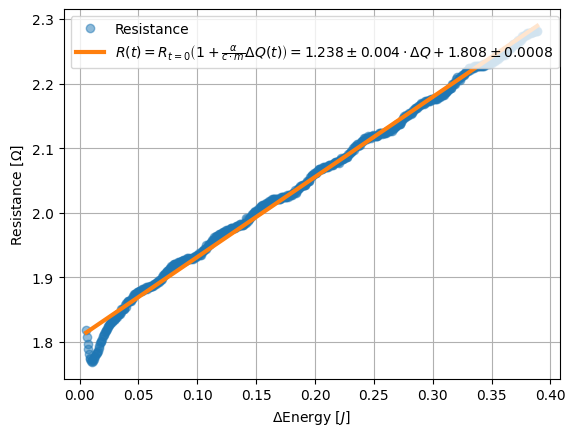

In [217]:
t, Vx, Vy = importData("Cu1_Cu2.CSV")


current, voltage, resistance, energy = IVRE(t, Vx, Vy)
start = np.argmin(resistance[140:160]) + 140
d_resistance = np.diff(resistance[720:750])
end = 750  #np.argmax(d_resistance) + 720
# resistance = resistance[start:end]
# TODO: Zero measurements

sliced_resistance = resistance[start:end]
sliced_energy = energy[start:end]

plt.plot(sliced_energy, sliced_resistance, 'o', label='Resistance', alpha=0.5)
plt.xlabel(r'$\Delta\mathrm{Energy}\ [J]$')
plt.ylabel('Resistance [$\Omega$]')
plt.grid()

# Linear regression
fit = linregress(sliced_energy, sliced_resistance)
x_lin = fit.slope * sliced_energy + fit.intercept

digits_amount = 4
slope = round(fit.slope, digits_amount)
slope_err = round(fit.stderr, digits_amount)
intercept = round(fit.intercept, digits_amount)
intercept_err = round(fit.intercept_stderr, digits_amount)
copper_sequence = (t[:], energy[:])

plt.plot(sliced_energy, x_lin, '-', label = fr"$R(t) = R_{{t=0}}\left(1+\frac{{\alpha}}{{c \cdot m}} \Delta Q(t)\right)= {slope:.3f} \pm {slope_err:.3f} \cdot \Delta Q + {intercept:.3f} \pm {intercept_err:.4f}$"
, linewidth=3,)

plt.legend(loc="upper left")
# TODO: Error bars
# TODO: Use IEEE notation for bibliography

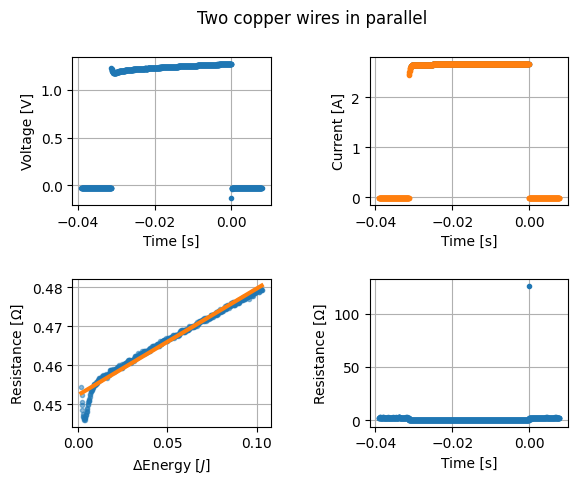

In [218]:
fig, axs = plt.subplots(2,2)
fig.suptitle("Two copper wires in parallel")
voltage_plot = axs[0, 0]
current_plot = axs[0, 1]
energy_plot = axs[1, 0]
resistance_plot = axs[1, 1]
t, Vx, Vy = importData("Cu1_Cu2_parallel_better.CSV")

current, voltage, resistance, energy = IVRE(t, Vx, Vy)
start = np.argmin(resistance[140:160]) + 140
d_resistance = np.diff(resistance[720:750])
end = 750  #np.argmax(d_resistance) + 720
# resistance = resistance[start:end]
# TODO: Zero measurements

plt.subplots_adjust(wspace=0.5, hspace=0.5)

# voltage_plot.plot(t[start:end], voltage[start:end], '.')
voltage_plot.plot(t, voltage, '.')
voltage_plot.set_xlabel('Time [s]')
voltage_plot.set_ylabel('Voltage [V]')
voltage_plot.grid()

current_plot.plot(t[start:end], current[start:end], '.')
current_plot.plot(t, current, '.')
current_plot.set_xlabel('Time [s]')
current_plot.set_ylabel('Current [A]')
current_plot.grid()

sliced_resistance = resistance[start:end]
sliced_energy = energy[start:end]

# resistance_plot.plot(t[start:end], sliced_resistance, '.')
resistance_plot.plot(t, resistance, '.')
resistance_plot.set_xlabel('Time [s]')
resistance_plot.set_ylabel('Resistance [Ω]')
resistance_plot.grid()
copper_parallel = (t[:], energy[:])

energy_plot.plot(sliced_energy, sliced_resistance, '.', label='Resistance', alpha=0.5)
energy_plot.set_xlabel(r'$\Delta\mathrm{Energy}\ [J]$')
energy_plot.set_ylabel(r'Resistance [$\Omega$]')
energy_plot.grid()

# Linear regression
fit = linregress(sliced_energy, sliced_resistance)
x_lin = fit.slope * sliced_energy + fit.intercept

digits_amount = 4
slope = round(fit.slope, digits_amount)
slope_err = round(fit.stderr, digits_amount)
intercept = round(fit.intercept, digits_amount)
intercept_err = round(fit.intercept_stderr, digits_amount)

energy_plot.plot(sliced_energy, x_lin, '-', linewidth=3)
# TODO: Error bars
# TODO: Use IEEE notation for bibliography

<>:16: SyntaxWarning: invalid escape sequence '\O'
<>:16: SyntaxWarning: invalid escape sequence '\O'
C:\Users\danda\AppData\Local\Temp\ipykernel_19444\3697905887.py:16: SyntaxWarning: invalid escape sequence '\O'
  plt.ylabel('Resistance [$\Omega$]')


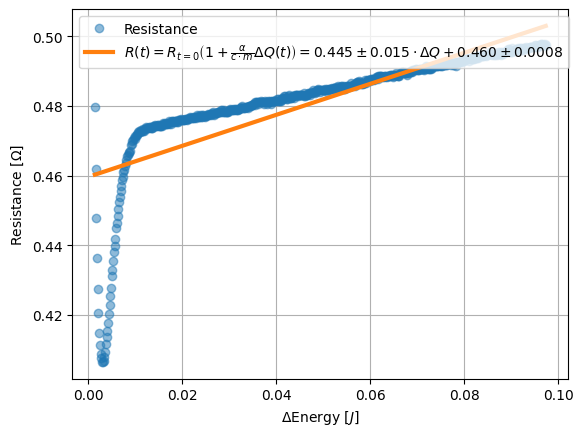

In [219]:
t, Vx, Vy = importData("Cu1_Cu2_parallel.CSV")


current, voltage, resistance, energy = IVRE(t, Vx, Vy)
start = np.argmin(resistance[140:160]) + 140
d_resistance = np.diff(resistance[720:750])
end = 750  #np.argmax(d_resistance) + 720
# resistance = resistance[start:end]
# TODO: Zero measurements

sliced_resistance = resistance[start:end]
sliced_energy = energy[start:end]

plt.plot(sliced_energy, sliced_resistance, 'o', label='Resistance', alpha=0.5)
plt.xlabel(r'$\Delta\mathrm{Energy}\ [J]$')
plt.ylabel('Resistance [$\Omega$]')
plt.grid()

# Linear regression
fit = linregress(sliced_energy, sliced_resistance)
x_lin = fit.slope * sliced_energy + fit.intercept

digits_amount = 4
slope = round(fit.slope, digits_amount)
slope_err = round(fit.stderr, digits_amount)
intercept = round(fit.intercept, digits_amount)
intercept_err = round(fit.intercept_stderr, digits_amount)

plt.plot(sliced_energy, x_lin, '-', label = fr"$R(t) = R_{{t=0}}\left(1+\frac{{\alpha}}{{c \cdot m}} \Delta Q(t)\right)= {slope:.3f} \pm {slope_err:.3f} \cdot \Delta Q + {intercept:.3f} \pm {intercept_err:.4f}$"
, linewidth=3,)

plt.legend(loc="upper left")
# TODO: Error bars
# TODO: Use IEEE notation for bibliography

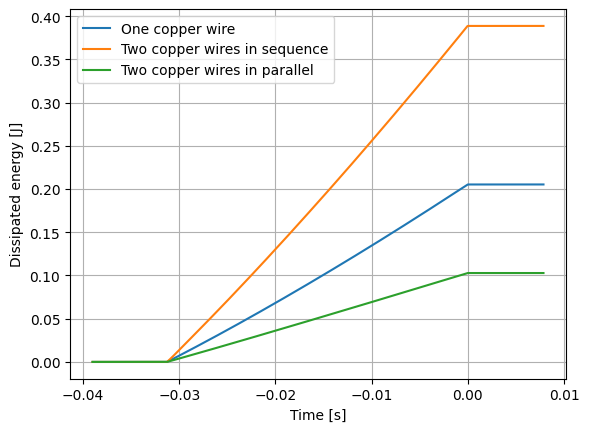

In [220]:
plt.plot(copper_only[0][1:], copper_only[1], label="One copper wire")
plt.plot(copper_sequence[0][1:], copper_sequence[1], label="Two copper wires in sequence")
plt.plot(copper_parallel[0][1:], copper_parallel[1], label="Two copper wires in parallel")
plt.grid()
plt.xlabel("Time [s]")
plt.ylabel("Dissipated energy [J]")
plt.legend()
plt.show()

<div class="alert alert-block alert-danger", dir=rtl>
<b>שימו לב:</b> האם כל הקבצים (קבצי מדידות (csv), קבצי עיבוד, תמונות...) הועלו למודל?
</div>